In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import numpy as np
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [2]:
train_original = train.copy()

In [3]:
test_original = test.copy()

In [4]:

train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

In [5]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [6]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [7]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Married'].fillna(train['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

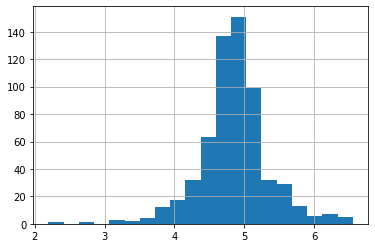

In [8]:
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log']=np.log(test['LoanAmount'])

In [9]:
train


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,4.852030
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1,4.262680
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1,3.688879
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1,5.533389
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1,5.231109


In [10]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [11]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

In [12]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,4.852030
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,4.787492
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,4.262680
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,3.688879
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,5.533389
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,5.231109


In [13]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [14]:
y.dtypes

dtype('int64')

In [15]:
X = pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [16]:
X


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,4.852030,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,...,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,4.262680,1,0,1,0,...,1,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.0,180.0,1.0,3.688879,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0
611,8072,240.0,253.0,360.0,1.0,5.533389,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,5.231109,0,1,0,1,...,0,0,1,1,0,1,0,0,0,1


In [17]:
#train['Loan_Status'].replace(0, 'N',inplace=True)
#train['Loan_Status'].replace(1, 'Y',inplace=True)
#y['Loan_Status'].replace(0, 'N',inplace=True)
#y['Loan_Status'].replace(1, 'Y',inplace=True)
#y

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
#from sklearn.preprocessing import StandardScaler

#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [20]:
#X_train
y_test

350    1
377    1
163    1
609    1
132    1
      ..
380    1
446    1
144    1
290    1
353    0
Name: Loan_Status, Length: 185, dtype: int64

In [21]:

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 20,random_state=0) 
clf.fit(X_train, y_train)
y_pred =clf.predict(X_test)
#from sklearn.ensemble import RandomForestRegressor
#regressor = RandomForestRegressor(n_estimators=1000, random_state=42)
#regressor.fit(X_train, y_train)
#y_pred =regressor.predict(X_test)

In [22]:
clf.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=209652396),
 DecisionTreeClassifier(max_features='auto', random_state=398764591),
 DecisionTreeClassifier(max_features='auto', random_state=924231285),
 DecisionTreeClassifier(max_features='auto', random_state=1478610112),
 DecisionTreeClassifier(max_features='auto', random_state=441365315),
 DecisionTreeClassifier(max_features='auto', random_state=1537364731),
 DecisionTreeClassifier(max_features='auto', random_state=192771779),
 DecisionTreeClassifier(max_features='auto', random_state=1491434855),
 DecisionTreeClassifier(max_features='auto', random_state=1819583497),
 DecisionTreeClassifier(max_features='auto', random_state=530702035),
 DecisionTreeClassifier(max_features='auto', random_state=626610453),
 DecisionTreeClassifier(max_features='auto', random_state=1650906866),
 DecisionTreeClassifier(max_features='auto', random_state=1879422756),
 DecisionTreeClassifier(max_features='auto', random_state=1277901399),
 DecisionTree

In [23]:
plt.figure(figsize=(150,150))
from sklearn import tree
for i in range(len(clf.estimators_)):
    tree.plot_tree(clf.estimators_[2],filled=True)

In [24]:
# Import tools needed for visualization
#from sklearn.tree import export_graphviz
#import pydot

# Pull out one tree from the forest
#tree = clf.estimators_[5]

# Export the image to a dot file
#export_graphviz(tree, out_file = 'tree.dot',  rounded = True, precision = 1)

# Use dot file to create a graph
#(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
#graph.write_png('tree.png'); 

In [25]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [26]:
#from sklearn.metrics import confusion_matrix
#confusion_matrix(regressor,X_test,y_test)

In [27]:
#print(y_pred)

In [28]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,np.round(y_pred)))
print(classification_report(y_test,np.round(y_pred)))
print(accuracy_score(y_test,np.round(y_pred)))

[[ 33  32]
 [ 11 109]]
              precision    recall  f1-score   support

           0       0.75      0.51      0.61        65
           1       0.77      0.91      0.84       120

    accuracy                           0.77       185
   macro avg       0.76      0.71      0.72       185
weighted avg       0.76      0.77      0.75       185

0.7675675675675676


In [29]:
confusion_matrix(y_test,np.round(y_pred))

array([[ 33,  32],
       [ 11, 109]], dtype=int64)

In [30]:
sub = pd.read_csv('sub.csv')

In [31]:
sub

,Loan_ID,Loan_Status


In [32]:
y_pred1 =clf.predict(test)

In [33]:
y_pred1

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,

In [34]:

sub['Loan_Status']=np.round(y_pred1)
sub['Loan_ID']=test_original['Loan_ID']

In [35]:
sub.head(10)

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,0
5,LP001054,1
6,LP001055,1
7,LP001056,0
8,LP001059,1
9,LP001067,1


In [36]:
sub['Loan_Status'].replace(0, 'N',inplace=True)
sub['Loan_Status'].replace(1, 'Y',inplace=True)

In [37]:
sub.head(10)

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N
5,LP001054,Y
6,LP001055,Y
7,LP001056,N
8,LP001059,Y
9,LP001067,Y


In [38]:
#pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('OutputSubmission.csv')

In [39]:
from sklearn.model_selection import StratifiedKFold

In [40]:
from sklearn.ensemble import RandomForestClassifier
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
 print ('\n{} of kfold {} '.format(i,kf.n_splits))
 xtr,xvl = X.loc[train_index],X.loc[test_index]
 ytr,yvl = y[train_index],y[test_index]
 model = RandomForestClassifier(random_state=1, max_depth=10)
 model.fit(xtr,ytr)
 pred_test=model.predict(xvl)
 score=accuracy_score(yvl,pred_test)
 mean += score
 print ('accuracy_score',score)
 i+=1
 pred_test = model.predict(test)
 pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5 
accuracy_score 0.8130081300813008

2 of kfold 5 
accuracy_score 0.8455284552845529

3 of kfold 5 
accuracy_score 0.7967479674796748

4 of kfold 5 
accuracy_score 0.8130081300813008

5 of kfold 5 
accuracy_score 0.7540983606557377

 Mean Validation Accuracy 0.8044782087165135


In [41]:
#errors = abs(y_pred - y_test)

In [42]:
#errors

In [43]:
#print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

In [44]:
#mape = 100 * (errors / y_test)

In [45]:
#mape

In [46]:

#from sklearn import metrics

#print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
#print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [47]:
#accuracy = 100 - np.mean(mape)

In [48]:
#print('Accuracy:', round(accuracy, 2), '%.')

In [49]:
#y_pred

In [50]:
#t=np.round(y_pred)

In [51]:
#t

In [52]:
#from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#print(confusion_matrix(y_test,y_pred))
#print(classification_report(y_test,y_pred))
#print(accuracy_score(y_test, y_pred))